In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.data_loader import load_data, compute_log_returns
from src.eda import plot_price, plot_returns
from src.change_point_model import build_model, sample_model
from src.diagnostics import summarize, plot_trace, plot_tau
from src.interpretation import summarize_impact



WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
d:\assesment\change_point_analysis\.venv\Lib\site-packages\arviz\__init__.py:50: FutureWarning: 
ArviZ is undergoing a major refactor to improve flexibility and extensibility while maintaining a user-friendly interface.
Some upcoming changes may be backward incompatible.
For details and migration guidance, visit: https://python.arviz.org/en/latest/user_guide/migration_guide.html
  warn(


d:\assesment\change_point_analysis\src\data_loader.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)


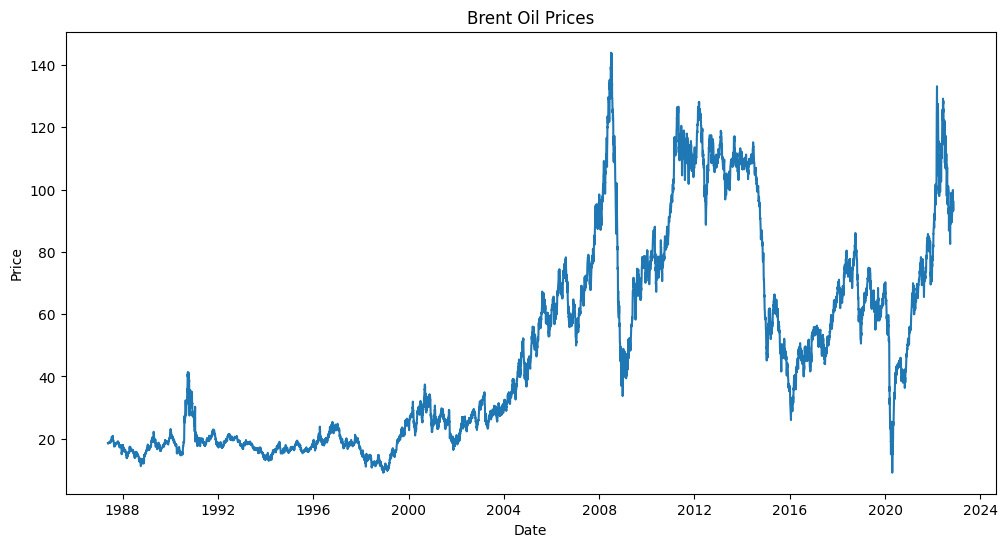

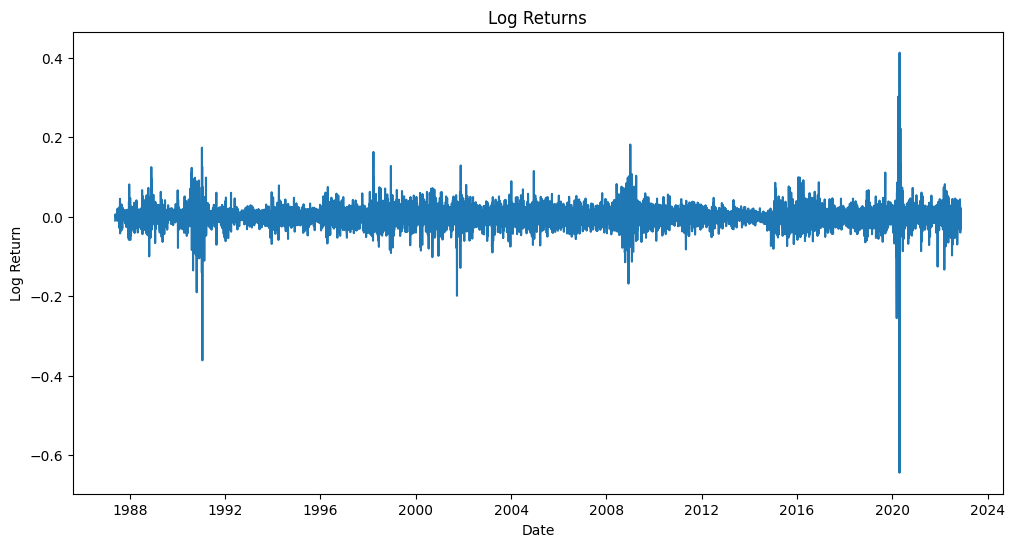

In [2]:
df = load_data("../data/raw/BrentOilPrices.csv")
plot_price(df)

df = compute_log_returns(df)
plot_returns(df)


In [3]:
returns = df["log_return"].values

model = build_model(returns)
trace = sample_model(model)


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu1, mu2, sigma]


d:\assesment\change_point_analysis\.venv\Lib\site-packages\rich\live.py:260: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 22335 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


           mean        sd  hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
tau    3701.631  3353.529   0.000  8825.000   1822.746  509.325       4.0   
mu1       0.000     0.002  -0.004     0.003      0.000    0.000     538.0   
mu2       0.000     0.002  -0.001     0.003      0.000    0.001     228.0   
sigma     0.026     0.000   0.025     0.026      0.000    0.000    1310.0   

       ess_tail  r_hat  
tau        17.0   1.47  
mu1       140.0   1.13  
mu2        30.0   1.17  
sigma    1337.0   1.00  


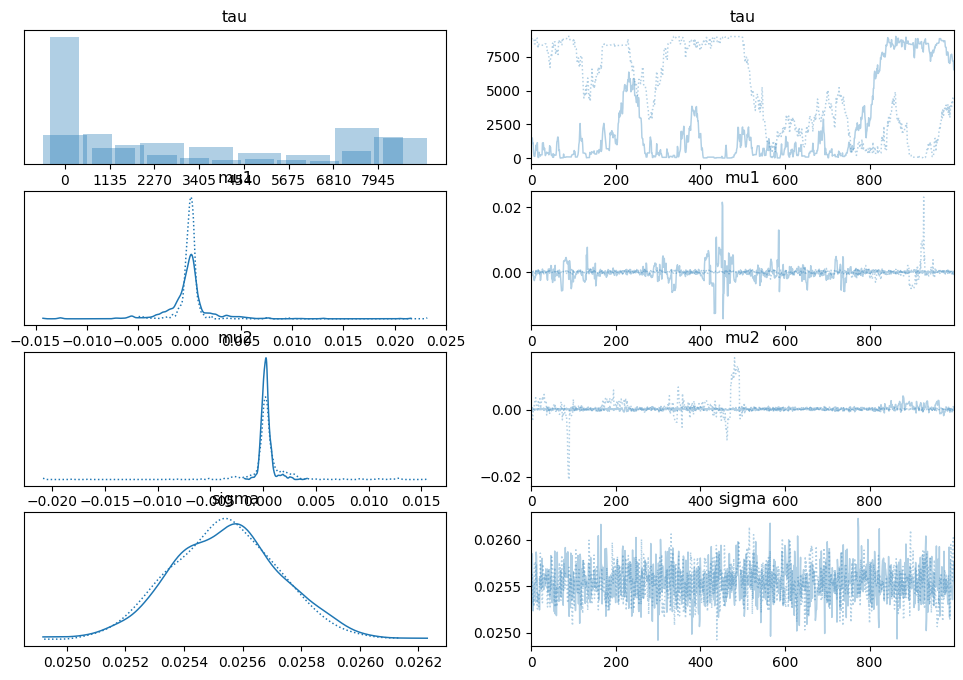

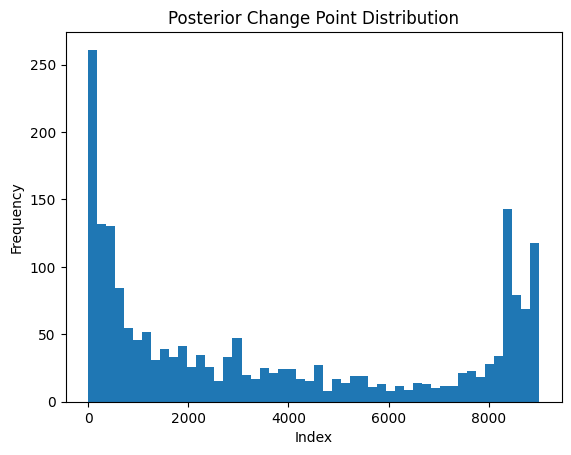

In [4]:
summarize(trace)
plot_trace(trace)
plot_tau(trace)


In [5]:
summarize_impact(trace, df)


Estimated change date: 1997-09-03 00:00:00
Mean before: 1.1068371346490041e-05
Mean after: 0.0003847958325277083
Relative change: 33.7653525963179
